<a href="https://colab.research.google.com/github/serinamarie/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Grill_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
df = pd.read_csv("https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv")

In [45]:
print(df.shape)

(8985, 22)


In [46]:
df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,7/10/2019,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.245429,0.0,45.0,45.0,46.11691,43.25077,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,17:32:53 10 Jul 2019
1,Donald Trump,All polls,7/10/2019,1/20/2017,1/22/2017,Morning Consult,B-,1992.0,rv,0.944206,0.0,46.0,37.0,44.10444,38.85347,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,17:32:53 10 Jul 2019
2,Donald Trump,All polls,7/10/2019,1/20/2017,1/24/2017,Ipsos,B+,1632.0,a,0.224456,0.0,42.1,45.2,42.81495,43.93185,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,17:32:53 10 Jul 2019
3,Donald Trump,All polls,7/10/2019,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.226788,0.0,45.0,46.0,46.11691,44.25077,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,17:32:53 10 Jul 2019
4,Donald Trump,All polls,7/10/2019,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.220390,0.0,57.0,43.0,51.37431,44.21580,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,17:32:53 10 Jul 2019


In [73]:
df.describe()

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id
count,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000
mean,2096.950417,0.385447,0.003826,42.174954,53.646574,41.153583,53.416222,53564.050640,85733.409794
std,2740.216719,0.473484,0.045564,3.781397,3.342878,2.848648,2.844113,3354.826523,6743.485101
min,121.000000,0.000000,0.000000,23.900000,35.000000,25.077920,37.296270,49232.000000,77244.000000
25%,1039.000000,0.139689,0.000000,39.700000,51.600000,39.177920,51.802620,50291.000000,79040.000000
50%,1500.000000,0.157990,0.000000,42.000000,54.000000,41.116910,53.487490,52664.000000,83385.000000
75%,2001.000000,0.315686,0.000000,45.000000,56.000000,43.056110,55.250770,57236.000000,92562.000000
max,55372.000000,2.992242,1.338569,59.000000,75.900000,54.585210,70.101400,58639.000000,99140.000000


In [47]:
df.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp'],
      dtype='object')

In [48]:
df.sort_values(by="approve", ascending=False).head(10)
#Highest approval ratings are all alongside a "grade" column of "C+"" and from "Rasmussen Reports/Pulse Opinion Research"

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
6151,Donald Trump,Voters,7/10/2019,1/23/2017,1/25/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.204770,0.0,59.0,41.0,54.58521,41.67927,NaN,T,http://www.rasmussenreports.com/public_content...,49247,77259,1/26/2017,17:35:13 10 Jul 2019
8,Donald Trump,All polls,7/10/2019,1/23/2017,1/25/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.204770,0.0,59.0,41.0,53.37431,42.21580,NaN,T,http://www.rasmussenreports.com/public_content...,49247,77259,1/26/2017,17:32:53 10 Jul 2019
4,Donald Trump,All polls,7/10/2019,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.220390,0.0,57.0,43.0,51.37431,44.21580,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,17:32:53 10 Jul 2019
6149,Donald Trump,Voters,7/10/2019,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.220390,0.0,57.0,43.0,52.58521,43.67927,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,17:35:13 10 Jul 2019
15,Donald Trump,All polls,7/10/2019,1/24/2017,1/26/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.191863,0.0,55.0,45.0,49.37431,46.21580,NaN,T,http://www.rasmussenreports.com/public_content...,49234,77246,1/27/2017,17:32:53 10 Jul 2019
6207,Donald Trump,Voters,7/10/2019,2/13/2017,2/15/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.136004,0.0,55.0,45.0,50.58521,45.67927,NaN,T,http://www.rasmussenreports.com/public_content...,49302,77318,2/16/2017,17:35:13 10 Jul 2019
6209,Donald Trump,Voters,7/10/2019,2/14/2017,2/16/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.136063,0.0,55.0,45.0,50.58521,45.67927,NaN,T,http://www.rasmussenreports.com/public_content...,49300,77316,2/17/2017,17:35:13 10 Jul 2019
6154,Donald Trump,Voters,7/10/2019,1/24/2017,1/26/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.191863,0.0,55.0,45.0,50.58521,45.67927,NaN,T,http://www.rasmussenreports.com/public_content...,49234,77246,1/27/2017,17:35:13 10 Jul 2019
94,Donald Trump,All polls,7/10/2019,2/14/2017,2/16/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.136063,0.0,55.0,45.0,49.37431,46.21580,NaN,T,http://www.rasmussenreports.com/public_content...,49300,77316,2/17/2017,17:32:53 10 Jul 2019
89,Donald Trump,All polls,7/10/2019,2/13/2017,2/15/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.136004,0.0,55.0,45.0,49.37431,46.21580,NaN,T,http://www.rasmussenreports.com/public_content...,49302,77318,2/16/2017,17:32:53 10 Jul 2019


In [49]:
df.enddate.sort_values(ascending=False)
#Data isn't in order by year so we would need to clean this to analyze
#how Trump's approval ratings may have changed over time

5352     9/9/2018
7737     9/9/2018
5351     9/9/2018
5344     9/9/2018
2293     9/9/2018
2291     9/9/2018
5342     9/9/2018
5341     9/9/2018
2290     9/9/2018
5353     9/9/2018
2288     9/9/2018
2286     9/9/2018
7745     9/9/2018
7743     9/9/2018
7742     9/9/2018
7739     9/9/2018
2284     9/9/2018
5349     9/9/2018
7735     9/9/2018
7734     9/9/2018
2281     9/9/2018
2280     9/9/2018
7746     9/9/2018
2277     9/9/2018
2275     9/9/2018
7748     9/9/2018
2296     9/9/2018
4345     9/9/2017
4344     9/9/2017
4343     9/9/2017
          ...    
2849    1/10/2019
2828    1/10/2019
8221    1/10/2019
4717    1/10/2018
1353    1/10/2018
1359    1/10/2018
1366    1/10/2018
1368    1/10/2018
1371    1/10/2018
1374    1/10/2018
1375    1/10/2018
4715    1/10/2018
4712    1/10/2018
7019    1/10/2018
4709    1/10/2018
4704    1/10/2018
7016    1/10/2018
7013    1/10/2018
7022    1/10/2018
2798     1/1/2019
5680     1/1/2019
5676     1/1/2019
8194     1/1/2019
5682     1/1/2019
5681     1

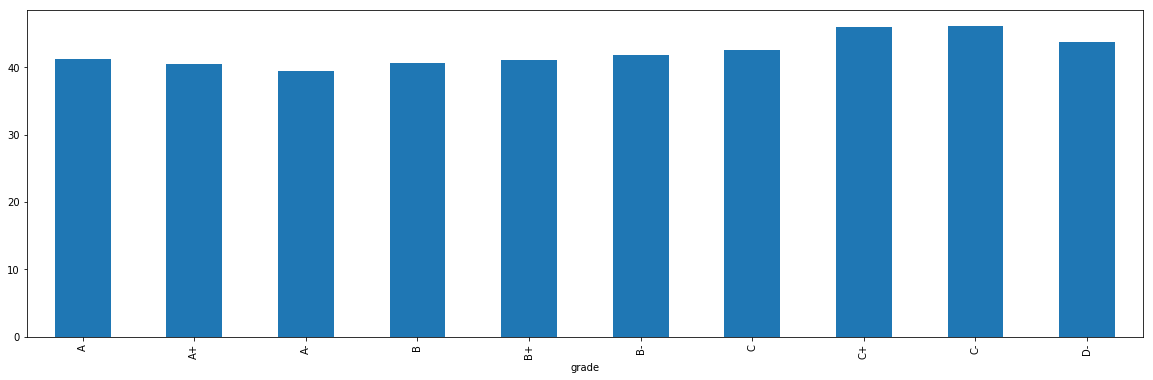

In [50]:
df.groupby('grade').approve.mean().plot(kind='bar', figsize=(20,6))
#Illustrates how the lower grade almost seems to correlate with a higher percentage of approval

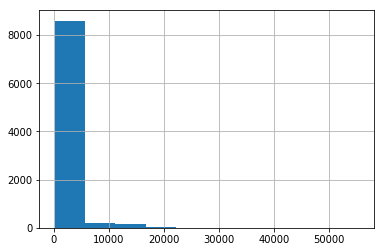

In [65]:
df.subgroup.unique()
df.samplesize.sort_values()
df.samplesize.hist()
plt.show()
#Nothing exciting here

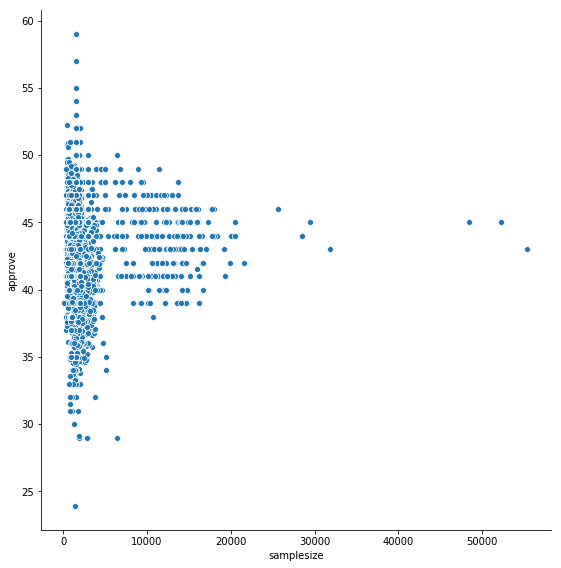

In [74]:
sns.pairplot(x_vars=["samplesize"], y_vars=["approve"], data=df, height=8)
plt.show()
#I don't see any correlations. However, the lowest sample sizes have the 
#greatest outliers in terms of approval rating


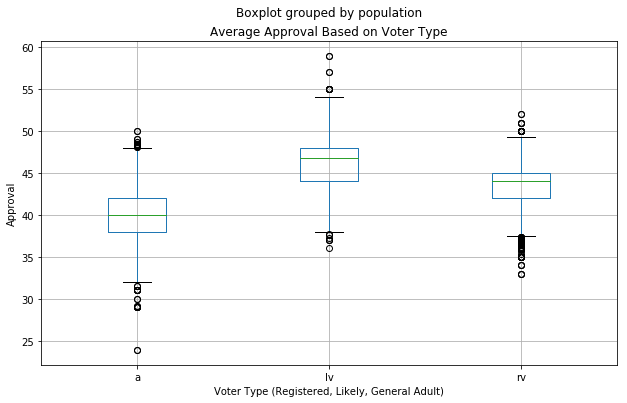

In [70]:
df.boxplot(column='approve', by='population', figsize=(10,6))

plt.xlabel("Voter Type (Registered, Likely, General Adult)")
plt.ylabel("Approval")
plt.title("Average Approval Based on Voter Type")
plt.show()

#The general population appears to have a slightly lower approval rating of the US President
#than likely voters and registered voters


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. What I decided to was take a look at Donald Trump's approval ratings and see if I could find any correlations with other aspects of the data. As you can see I tried visualizing the data through a boxplot, a histogram, and a scatterpoint graph. There could possibly be correlations with approval based on whether or not they are a registered voter, whether the sample size was large or not, and whether the pollster gave the president a high grade. 
2. The most challenging part is finding interesting things of note in the data and following through. Many times your graphs and calculations don't add up to anythintg exciting.
3. The most interesting thing I observed was seeing a boxplot that had interesting differences within it.
4. I would like to explore another dataset and merge this one with that one.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.